# Filippo Conforto - MAPDB Assignment

## Libraries and inports

In [8]:
import numpy as np
import time
import requests as req
import json
from functools import reduce
import matplotlib.pyplot as plt

## Fun Exercise

The `XOR` operation between the given numbers give the correct results:

* 1 ^ 2 = 01 ^ 10 = 11 = 3
* 2 ^ 5 = 010 ^ 101 = 111 = 7
* 3 ^ 7 = 011 ^ 111 = 100 = 4
* 4 ^ 5 = 100 ^ 101 = 001 = 1
* 5 ^ 9 = 0101 ^ 1001 = 1100 = 12

## 1-Redundancy

The choosen file is "document.pdf", starting from this one the "stripe" files will be produced.

### 1.1

Starting by the original file and reading bunches of 4 bytes each time is possible to divide each group between the final files. The parity is then calculated over this bunch of bytes and then printed in the last file.

In [9]:
filenames = ["raid4.0","raid4.1","raid4.2","raid4.3","raid4.4"]
doc = open("document.pdf", "rb")
flist = []
llist = []
for name in filenames:
    flist.append(open(name, "wb"))
    llist.append([])
parities = [0]*5

In [10]:
byt = doc.read(4)
while len(byt)==4:
    for i in range(4):
        flist[i].write(bytes([byt[i]]))
        llist[i].append(byt[i])
    flist[4].write(bytes([byt[0]^byt[1]^byt[2]^byt[3]]))
    llist[4].append(byt[0]^byt[1]^byt[2]^byt[3])
    byt = doc.read(4)
    if len(byt)==0:
        break
    elif len(byt)<4:
        byt = list(byt)
        byt.extend([0]*(4-len(byt)))
    

The parity is calculated as D1 ^ D2 ^ D3 ^ D4.

 If there are less than 4 bytes, an adequate number of zeros is added in order to apply correctly the parity functions.

The output files are visible in the folder.

### Ex 1.2

The column-wise parity acts as a checksum for each strip file.

In [11]:
for i,l in enumerate(llist):
    parities[i] = (reduce(lambda x, y: x ^ y, l))
    flist[i].write(bytes([parities[i]]))
    llist[i].append(parities[i])

for fs in flist:
    fs.close()
doc.close()    

The parties are then added a the end of the files

In [12]:
print("The parities values are ",list(map(chr,parities)))

The parities values are  ['¥', '\x07', '\xa0', '\x9c', '\x9e']


 The size overhead is calculated as: 
 
 $$ \frac{\rm{Total \ size \ of \ the \ final \ files} - \rm{Size \ of \ the \ original \ file}}{ \rm{Size \ of \ the \ original  \ file}} $$

In [15]:
print(f"The size overhead is {(sum(list(map(len,llist)))-42656*4)/(42656*4)*100:1}%")

The size overhead is 25.0%


### 1.3

In [53]:
print(f"The 5 byte parity value is {hex(parities[0])}0{hex(parities[1])[2:4]}{hex(parities[2])[2:4]}{hex(parities[3])[2:4]}{hex(parities[4])[2:4]}")

0xa507a09c9e


### 1.4

It would be zero, since it corresponds to the parity between the two quantities:

(D0^D1^D2^D3)^(D0^D1^D2^D3) = (D0^D0) ^ (D1^D1) ^ (D2^D2) ^ (D3^D3) = 0

### 1.5

Since the new parity is 0xa507a09c9e, then the error is located in the fourth disk. Then in order to reconstruct the original file, the file to be used are the first three and the parity one. By applying the parity between each group of bytes coming from these files the result will be the fourth one.

## 2

### 2.1

The encryption technique is clearly a symmetric one since the key is the same used for encrypting and decrypting the message.

### 2.2

The original message is "K]amua!trgpy".

In [63]:
alist = np.asarray(list(map(ord,"K]amua!trgpy")))

The original string is transformed into an array of ascii values.

In [64]:
alist = alist - np.arange(5,5+alist.shape[0])
clist = alist.copy().reshape(1,-1)

The nonce is removed using numpy functions.

In [65]:
for i in range(1,256):
    if np.all((alist - i)>0):
        clist = np.concatenate([clist,(alist - i).reshape(1,-1)])
    else:
        nlist = (alist - i)
        nlist[nlist <0]+=255
        clist = np.concatenate([clist,nlist.reshape(1,-1)])

In the same way all the number between 1 and 255 are subtracted to the original message in order to find the correct results.

Since with large numbers the resulting array would contain negative numbers, in this case they are increased by 255. The final result is so significative.

In [67]:
wordlist = [[''.join([chr(x) for x in word]),i+1] for i,word in enumerate(clist)]

In [70]:
print(f"The used key is {wordlist[245][1]}, the original message text is \"{wordlist[245][0]}\"")

The used key is 246, the original message text is "Padova rocks"


## 3 

### 3.1

The occupation process can be simulated using random functions given by numpy.

In [20]:
occ10 = np.zeros(10)

while  (not np.any(occ10 >= 1.)):
    occ10[np.random.randint(0,10)]+=0.01

Since each file occupies 10 GB, or 0.01 TB, for each hard disk, if chosen, the stored memory increases by 0.01.

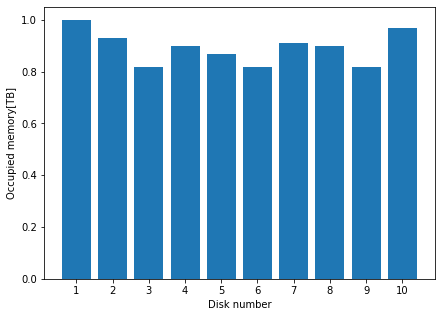

In [21]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.bar(np.arange(1,11),occ10)
ax.set_xlabel("Disk number")
ax.set_ylabel("Occupied memory[TB]")
ax.set_xticks(list(range(1,11)))
plt.show()


In [22]:
print(f"The number of placed files is {sum(occ10)/0.01:.0f}")

The number of placed files is 894


In [23]:
print(f"The occupation percentage is  {sum(occ10)*100/10:.1f} %")

The occupation percentage is  89.4 %


### 3.2

In [24]:
occ1 = np.zeros(10)

while  (not np.any(occ1 >= 1.)):
    occ1[np.random.randint(0,10)]+=0.001

Since each file occupies 1 GB, or 0.001 TB, for each hard disk, if chosen, the stored memory increases by 0.001.

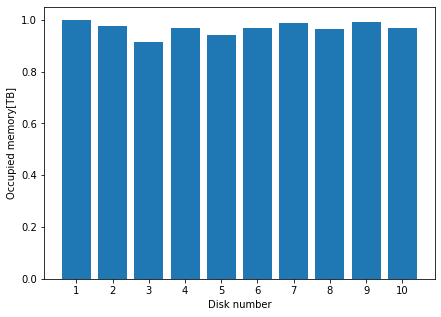

In [25]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.bar(np.arange(1,11),occ1)
ax.set_xlabel("Disk number")
ax.set_ylabel("Occupied memory[TB]")
ax.set_xticks(list(range(1,11)))
plt.show()


In [26]:
print(f"The number of placed files is {sum(occ1)/0.001:.0f}")

The number of placed files is 9686


In [27]:
print(f"The occupation percentage is  {sum(occ1)*100/10:.2f} %")

The occupation percentage is  96.86 %


### 3.3

From these two examples is clear that by reducing the chunk size a better space occupation is possible.

In [29]:
occ4 = np.zeros(10)
while  (not np.any(occ4 >= 1.)):
    occ4[np.random.randint(0,10)]+=4e-6
#CONTROLLARE

Since each file occupies 4 MB, or $4\cdot 10^{-6}$ TB, for each hard disk, if chosen, the stored memory increases by $4\cdot 10^{-6}$.

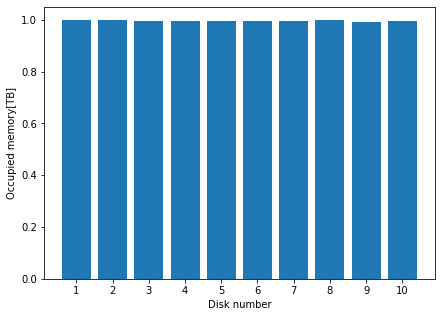

In [30]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.bar(np.arange(1,11),occ4)
ax.set_xlabel("Disk number")
ax.set_ylabel("Occupied memory[TB]")
ax.set_xticks(list(range(1,11)))
plt.show()


In [31]:
print(f"The number of placed files is {sum(occ4)/4e-6:.0f}")

The number of placed files is 2492084


In [32]:
print(f"The occupation percentage is  {sum(occ4)*100/10:.2f} %")

The occupation percentage is  99.68 %


The benefit is clear, since almost the totality of the disk is full.

### 3.4

In [33]:
print(f"The average used space for the first case is {np.mean(occ10):.3f} TB with a standard deviation of {np.std(occ10):.3f} TB")

The average used space for the first case is 0.894 TB with a standard deviation of 0.060 TB


In [34]:
print(f"The average used space for the first case is {np.mean(occ1):.3f} TB with a standard deviation of {np.std(occ1):.3f} TB")

The average used space for the first case is 0.969 TB with a standard deviation of 0.023 TB


In [35]:
print(f"The average used space for the first case is {np.mean(occ4):.3f} TB with a standard deviation of {np.std(occ4):.3f} TB")

The average used space for the first case is 0.997 TB with a standard deviation of 0.002 TB


Since the used space is obtained as a sum of random variables (the probability to add a file for a hard disk is inverse proportional to the number of hard disk), the sum of the memory used by single files, for the central limit theorem must behave as a gaussian distribution. 

This proposition can be verified using an higher number of disks a plotting the distribution of hard disk used spaces.

In [15]:
occt1 = np.zeros(500)
while  (not np.any(occt1 >= 1.)):
    occt1[np.random.randint(0,500)]+=0.01
occt2 = np.zeros(500)
while  (not np.any(occt2 >= 1.)):
    occt2[np.random.randint(0,500)]+=0.001
## The simulation with a larger number of disks for the case
## with 4 MB blocks takes too much time
#occt3 = np.zeros(500)
#while  (not np.any(occt3 >= 1.)):
#    occt3[np.random.randint(0,500)]+=4e-6

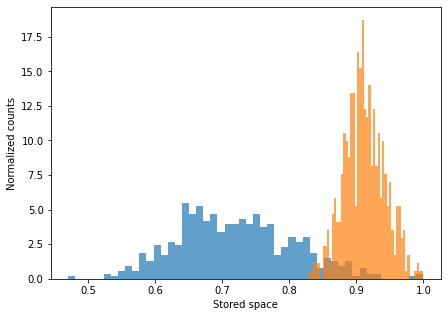

In [20]:
fig,ax = plt.subplots(1,1, figsize = (7,5))
ax.hist(occt1, alpha = 0.7, bins = 50, density = True)
ax.hist(occt2,alpha = 0.7, bins = 50, density = True)
#plt.hist(occt3,alpha = 0.7, bins =25)
ax.set_xlabel("Stored space")
ax.set_ylabel("Normalized counts")

plt.show()

## 4

### 4.1.1

All the operation are done on the server using the package `requests`. The package allows to send GET and POST and so to do all the operations required.

In [2]:
URL = "https://pansophy.app:8443"

Getting all the content of the server can be done using `get`.

In [11]:
r = req.get(url = URL, verify=False)

/home/filippo/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
r.json()

A json is used to append requests to the server.

In [40]:
data = {"operation": "merit",
        "team": "Giovanni",
        "coin": 1000,
        "stealfrom": "genesis"}

In [41]:
resp1 = req.post(url = URL, json = data, verify=False)

/home/filippo/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Another json is needed in order to claim the amount required. This one must be "posted" after 10s to pass the proof of time.

In [42]:
claim = {
    "operation": "claim",
    "team": "Giovanni"
}

In [43]:
resp2 = req.post(url = URL, json = claim, verify=False)

/home/filippo/.local/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pansophy.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


### 4.1.2

The maximum number of transactions that can be done in a day, given that only one transaction can be done at once and that the proof of time is 10s is simply calculated as

$$\frac{24 \cdot 60 \cdot 60 s}{10 s}= 8640$$

### 4.2/4.2.1

In [56]:
def calculate_hash(self):  
    block_of_string = "{}{}{}{}{}".format( self.index,
                                              self.team, 
                                              self.prev_hash,
                                              self.coins, 
                                              self.timestamp)  
    self.my_hash = hashlib.sha256(block_of_string.encode()).hexdigest()
    return self.my_hash

This function works as an hashing function that depends on the structure and the timestamp of a transaction, and also on the previous transation hash. In this way is possible to univocally associate an hash to each transaction.

### 4.2.2

A change on the blockchain can be found easily since a change of one of the old blocks implies a changes in all the next hashes, since each hash depends on the previous one. The existence of proof of time also allows to keep the system more secure, since a big number of changes in the blockchain would result in a large amount of time before the blockchain would be consistent.


### 4.2.3

Since POST does not depend on the number of transaction the dependence will be only O(1), while a larger dataset can increase the download time for the `GET` function, that will have a dependence of O(N), with N  the current number of transactions. This kind of linear dependence over N can be one of the major problems for scalability.

### 4.2.4

The account balances can be restored simply by starting from the inital state and redistributing the money according to the sequence of transaction.

### 4.2.5

The main advantage of REST APIs is the simplicity, the structure based on GET and POST functions that allows a complete communication with the server. Also the use of some communication standards, such as `JSON`, allows make the exchange of information even simpler. In particular `JSON` structure allows to have even hierarchical shape, with a plain representation that can be easily stored.

The main disadvantage of REST is that it stateless, so if the server crashes all the informations about the state are lost as was discussed in exercise 4.2.4.